In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
l = pd.read_csv("../data/lawrenson_to_1718.csv", usecols=[0, 1, 2, 3, 4])

In [3]:
m = pd.read_csv("../data/merson_to_1718.csv")

In [4]:
m.tail()

,Season,Home,Prediction,Away,Result
1568,1819,West Ham,1-1,Tottenham,0-1
1569,1819,Wolves,2-1,Watford,0-2
1570,1819,Huddersfield,0-3,Liverpool,0-1
1571,1819,Everton,2-0,Crystal Palace,2-0
1572,1819,Arsenal,3-1,Leicester,3-1


In [5]:
l.tail()

,Season,Home,Prediction,Away,Result
2705,1819.0,Everton,2-0,Crystal Palace,2-0
2706,1819.0,Arsenal,2-0,Leicester,3-1
2707,NaN,NaN,NaN,NaN,NaN
2708,NaN,NaN,NaN,NaN,NaN
2709,NaN,NaN,NaN,NaN,NaN


In [6]:
l.dropna(inplace=True)

In [7]:
m.dropna(inplace=True)

In [8]:
def convert_to_home_away(df):
    df["home_goals_prediction"] = df.Prediction.apply(lambda x: int(x.split("-")[0]))
    df["away_goals_prediction"] = df.Prediction.apply(lambda x: int(x.split("-")[1]))
    df["home_goals_result"] = df.Result.apply(lambda x: int(x.split("-")[0]))
    df["away_goals_result"] = df.Result.apply(lambda x: int(x.split("-")[1]))
    return df

In [9]:
m = convert_to_home_away(m)

In [10]:
l = convert_to_home_away(l)

In [11]:
pred_result = []

for row in l.itertuples():
    if row.home_goals_prediction == row.away_goals_prediction:
        pred_result.append("D")
    else:
        pred_result.append("W")

l["pred_result"] = pred_result

In [12]:
actual_result = []

for row in l.itertuples():
    if row.home_goals_result == row.away_goals_result:
        actual_result.append("D")
    else:
        actual_result.append("W")

l["actual_result"] = actual_result

In [13]:
pred_result = []

for row in m.itertuples():
    if row.home_goals_prediction == row.away_goals_prediction:
        pred_result.append("D")
    else:
        pred_result.append("W")

m["pred_result"] = pred_result

actual_result = []

for row in m.itertuples():
    if row.home_goals_result == row.away_goals_result:
        actual_result.append("D")
    else:
        actual_result.append("W")

m["actual_result"] = actual_result

In [14]:
# United have two names, map to one

In [15]:
m["Home"] = m.Home.apply(lambda x: x.replace("Man Utd", "Man United"))

In [16]:
l["Home"] = l.Home.apply(lambda x: x.replace("Man Utd", "Man United"))

In [17]:
m["Away"] = m.Away.apply(lambda x: x.replace("Man Utd", "Man United"))

In [18]:
l["Away"] = l.Away.apply(lambda x: x.replace("Man Utd", "Man United"))

In [19]:
m["predict_draw_success"] = (m.pred_result == "D") & (m.actual_result == "D")

In [20]:
l["predict_draw_success"] = (l.pred_result == "D") & (l.actual_result == "D")

Percentage of matches that are draws

In [21]:
round(len(l[l.actual_result == "D"]) / len(l), 2)

0.25

Merse success rate at predicting draws

In [22]:
round(len(m[m["predict_draw_success"] == True]) * 100 /len(m[m.pred_result == "D"]))

33

Lawro success rate at predicting draws

In [23]:
round(len(l[l["predict_draw_success"] == True]) * 100 /len(l[l.pred_result == "D"]))

34

Merse per season

In [24]:
for season in m.Season.unique():
    temp_df = m[m.Season == season]
    print(season)
    print(round(len(temp_df[temp_df["predict_draw_success"] == True]) * 100 /len(temp_df[temp_df.pred_result == "D"])))
    print()

1415
35

1516
36

1617
33

1718
25

1819
33



Lawro per season

In [25]:
for season in l.Season.unique():
    temp_df = l[l.Season == season]
    print(season)
    print(round(len(temp_df[temp_df["predict_draw_success"] == True]) * 100 /len(temp_df[temp_df.pred_result == "D"])))
    print()

1112.0
29

1213.0
40

1314.0
34

1415.0
30

1516.0
39

1617.0
31

1718.0
34

1819.0
30



put the two together

In [26]:
df = pd.merge(l, m, how="inner", on=["Season", "Home", "Away"], suffixes=("_l", "_m"))
len(df)

1569

In [27]:
both_pred_draw = len(df[(df.pred_result_l == "D") & (df.pred_result_m == "D")])
both_pred_draw

139

In [28]:
round(both_pred_draw * 100 / len(df), 1)

8.9

In [29]:
correct = len(df[(df.predict_draw_success_l == True) & (df.predict_draw_success_m == True)])
correct

58

Consensus predict draw rate

In [30]:
round(correct * 100 / both_pred_draw, 1)

41.7

consensus predict draw rate per season

In [31]:
for season in df.Season.unique():
    temp_df = df[df.Season == season]
    print(season)
    print(round(len(temp_df[(temp_df.predict_draw_success_l == True) & (temp_df.predict_draw_success_m == True)]) * 100 / len(temp_df[(temp_df.pred_result_l == "D") & (temp_df.pred_result_m == "D")])))
    print()

1415.0
42

1516.0
45

1617.0
45

1718.0
32

1819.0
33



Did anything change from the first three seasons to the last two?

In [33]:
df_pre = df[df.Season <= 1617]

In [34]:
df_post = df[df.Season >= 1718]

In [40]:
len(df_pre[(df_pre.pred_result_l == "D") & (df_pre.pred_result_m == "D")])

111

In [41]:
len(df_post[(df_post.pred_result_l == "D") & (df_post.pred_result_m == "D")])

28

In [38]:
len(df_pre[(df_pre.predict_draw_success_l == True) & (df_pre.predict_draw_success_m == True)])

49

In [39]:
len(df_post[(df_post.predict_draw_success_l == True) & (df_post.predict_draw_success_m == True)])

9

In [42]:
from scipy.stats import chi2_contingency

In [43]:
obs = np.array([[49, 62], [9, 19]])

In [44]:
chi2_contingency(obs)

(0.8768759694286513, 0.34905875617301585, 1, array([[46.31654676, 64.68345324],
        [11.68345324, 16.31654676]]))

p-value = 0.35, we are not significantly different at the 0.05 level. Carry on!

comparing with odds

In [30]:
results = pd.read_csv("../data/1415_results.csv", parse_dates=["Date"])

In [31]:
results["Season"] = int(1415)

In [32]:
for season in range(15,19):
    f_name = "../data/" + str(season) + str(season + 1) + "_results.csv"
    temp_df = pd.read_csv(f_name, parse_dates=["Date"])
    temp_df["Season"] = int(str(season) + str(season + 1))
    results = results.append(temp_df)

In [33]:
results.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5',
       'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5',
       'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU',
       'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'HC', 'HF', 'HR', 'HS', 'HST',
       'HTAG', 'HTHG', 'HTR', 'HY', 'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA',
       'LBD', 'LBH', 'PSA', 'PSCA', 'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee',
       'SJA', 'SJD', 'SJH', 'Season', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD',
       'WHH'],
      dtype='object')

In [34]:
odds = results[["HomeTeam", "AwayTeam", "BbMxD", "BbAvD", "Season", "Date"]]

In [35]:
len(odds)

1611

In [36]:
odds.dropna(inplace=True)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
len(odds)/380

4.2368421052631575

checking there are no team names different, as we will join on this

In [38]:
np.setdiff1d(odds.HomeTeam.unique(), df.Home.unique())

array([], dtype=object)

In [39]:
np.setdiff1d(df.Home.unique(), odds.HomeTeam.unique() )

array(['Brighton ', 'Burnley ', 'Cardiff ', 'Chelsea ', 'Crystal Palace ',
       'Leicester ', 'Man City ', 'Tottenham ', 'West Ham '], dtype=object)

In [40]:
df["Home"] = df.Home.apply(lambda x: x.strip())

In [41]:
np.setdiff1d(odds.HomeTeam.unique(), df.Home.unique())

array([], dtype=object)

In [42]:
np.setdiff1d(df.Home.unique(), odds.HomeTeam.unique() )

array([], dtype=object)

In [43]:
np.setdiff1d(odds.AwayTeam.unique(), df.Away.unique())

array([], dtype=object)

In [44]:
np.setdiff1d(df.Away.unique(), odds.AwayTeam.unique() )

array([], dtype=object)

In [45]:
df.head()

,Season,Home,Prediction_l,Away,Result_l,home_goals_prediction_l,away_goals_prediction_l,home_goals_result_l,away_goals_result_l,pred_result_l,...,predict_draw_success_l,Prediction_m,Result_m,home_goals_prediction_m,away_goals_prediction_m,home_goals_result_m,away_goals_result_m,pred_result_m,actual_result_m,predict_draw_success_m
0,1415,Arsenal,2-0,West Brom,4-1,2,0,4,1,W,...,False,3-1,4-1,3,1,4,1,W,W,False
1,1415,Aston Villa,2-0,Burnley,0-1,2,0,0,1,W,...,False,2-2,0-1,2,2,0,1,D,W,False
2,1415,Chelsea,2-0,Sunderland,3-1,2,0,3,1,W,...,False,4-0,3-1,4,0,3,1,W,W,False
3,1415,Crystal Palace,1-1,Swansea,1-0,1,1,1,0,D,...,False,2-2,1-0,2,2,1,0,D,W,False
4,1415,Everton,2-1,Tottenham,0-1,2,1,0,1,W,...,False,3-1,0-1,3,1,0,1,W,W,False


In [46]:
odds.head()

,HomeTeam,AwayTeam,BbMxD,BbAvD,Season,Date
0,Arsenal,Crystal Palace,6.70,5.96,1415,2014-08-16
1,Leicester,Everton,3.45,3.32,1415,2014-08-16
2,Man United,Swansea,5.50,4.96,1415,2014-08-16
3,QPR,Hull,3.40,3.18,1415,2014-08-16
4,Stoke,Aston Villa,3.50,3.38,1415,2014-08-16


In [47]:
df_odds = pd.merge(df, odds, 
                   left_on=["Home", "Away", "Season"], 
                   right_on=["HomeTeam", "AwayTeam", "Season"], 
                   how="inner")

In [48]:
len(df_odds)

1569

In [49]:
df_both_pick = df_odds[(df_odds.pred_result_l == "D") & (df_odds.pred_result_m == "D")]

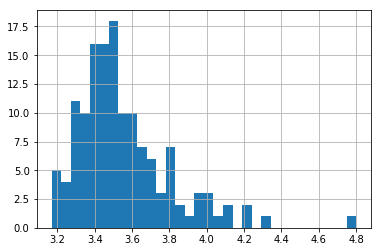

In [50]:
df_both_pick.BbMxD.hist(bins=32)

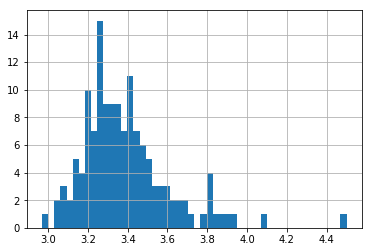

In [51]:
df_both_pick.BbAvD.hist(bins=50)

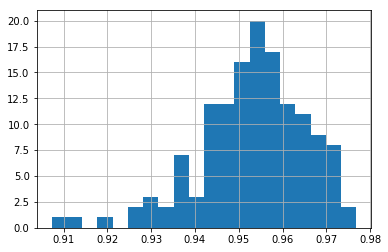

In [54]:
(df_both_pick.BbAvD / df_both_pick.BbMxD).hist(bins=20)

mean, std for max and average odds on the draw on matches that both picked

In [52]:
round(df_both_pick.BbMxD.mean(), 2)

3.55

In [53]:
round(df_both_pick.BbAvD.mean(), 2)

3.39

In [57]:
np.std(df_both_pick.BbMxD)

0.24918821671898198

In [58]:
np.std(df_both_pick.BbAvD)

0.22233072387536815

In [59]:
np.std(df_both_pick[df_both_pick.BbAvD < 3.65].BbAvD)

0.13890243307613043

In [60]:
starting_money = 1000
percentage_stake = 0.1

Past performance calcs

Using Constant Percentage Stake

71769.64099999997

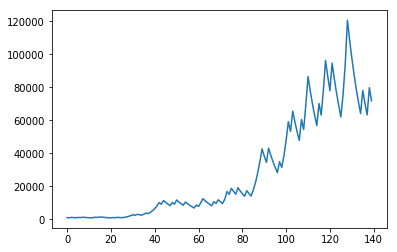

In [61]:
money = starting_money
money_history = [money]
longest_winning_streak = 0
longest_losing_streak = 0
current_winning_streak = 0
current_losing_streak = 0
total_staked = 0
total_won = 0

for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    total_staked += stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * 0.99
        total_won += stake * row.BbMxD * 0.99
        current_winning_streak += 1
        current_losing_streak = 0
    else:
        current_losing_streak += 1
        current_winning_streak = 0
    if current_winning_streak > longest_winning_streak:
        longest_winning_streak = current_winning_streak
    if current_losing_streak > longest_losing_streak:
        longest_losing_streak = current_losing_streak
    
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

Using Kelly Criterion

In [64]:
starting_money = 1000
prob_winning = 0.417 # assume consant, but may fluctuate
ratio_of_max = 0.99 # percentage of max draw odds we can get

117233.54999999999

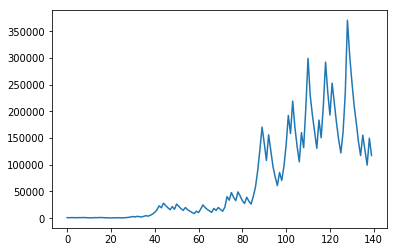

In [65]:
money = starting_money
money_history = [money]

total_staked = 0
total_won = 0

for row in df_both_pick.itertuples():
    kelly = ((prob_winning * row.BbMxD * ratio_of_max) - 1) / ((row.BbMxD * ratio_of_max) - 1)
    stake = round(money * kelly, -1)
    money -= stake
    total_staked += stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * ratio_of_max
        total_won += stake * row.BbMxD * ratio_of_max

    
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [66]:
min(money_history)

469.73199999999997

In [69]:
max(money_history)

370612.511

In [67]:
money_history.index(max(money_history))

128

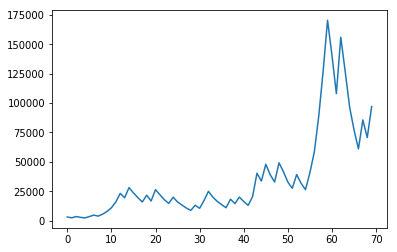

In [70]:
plt.plot(money_history[30:100])

In [71]:
longest_losing_streak

6

In [72]:
longest_winning_streak

5

In [73]:
total_won / total_staked

1.064201469247977

assume can't get best odds, see what 0.98 looks like

61420.23999999999

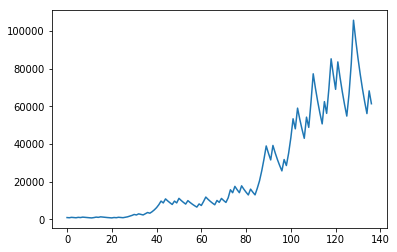

In [73]:
money = starting_money
money_history = [money]
for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * 0.98
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

41723.0

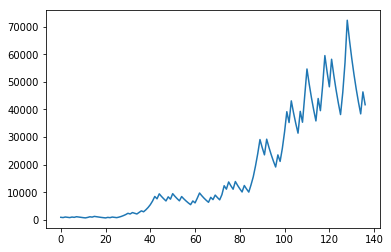

In [74]:
money = starting_money
money_history = [money]
for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbAvD
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

Looks like AvD and 0.95 are roughly equal

try taking out biggest 10% of odds (don't make them losses, just ignore)

In [75]:
df_both_pick.BbAvD.quantile(0.9)

3.645

11756.499999999995

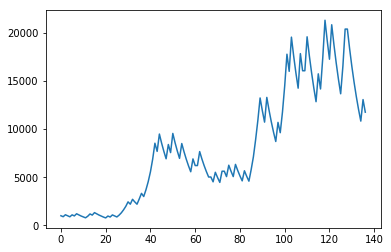

In [76]:
money = starting_money
money_history = [money]
for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        if row.BbAvD < 3.65:
            money += stake * row.BbAvD
        else:
            money += stake
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

Even Assuming average odds and missing out on top 10 largest wins, we make 12x in 4 seasons

That's an average of tripling bank each season. Jesus

In [79]:
round(100 * (df_both_pick.BbAvD / df_both_pick.BbMxD).mean(), 0)

95.0

Average is roughly 95% of max. 

If above 3.4, definitely take it

look only at last season

In [77]:
df_both_pick_1718 = df_both_pick[df_both_pick.Season == 1718]

In [80]:
ratio_of_max = 1.0

610.0999999999999

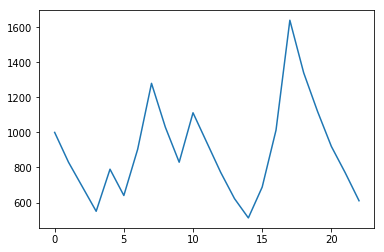

In [81]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    kelly = ((prob_winning * row.BbMxD * ratio_of_max) - 1) / ((row.BbMxD * ratio_of_max) - 1)
    stake = round(money * kelly, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

848.6750000000002

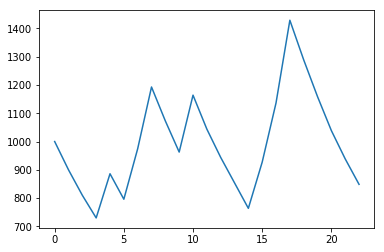

In [83]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * 0.95
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

679.5000000000002

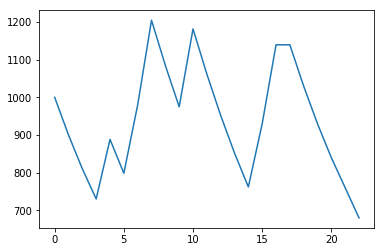

In [83]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        if row.BbAvD < 3.65:
            money += stake * row.BbAvD
        else:
            money += stake
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

only fails if miss out on big wins

How stable is their picking success?

In [74]:
success_rate = []
for i in range(1, len(df_both_pick)):
    picks_so_far = i
    df_so_far = df_both_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_l & df_so_far.predict_draw_success_m])
    rate_so_far = successes_so_far / picks_so_far
    success_rate.append(rate_so_far)

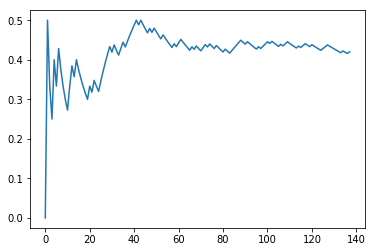

In [75]:
plt.plot(success_rate)

In [76]:
len(success_rate)

138

In [77]:
np.mean(success_rate[0:int(len(success_rate)/2)])

0.4047483646608209

In [78]:
np.mean(success_rate[int(len(success_rate)/2):])

0.4328414024608917

In [79]:
np.mean(success_rate[40:92])

0.44619326408693694

In [80]:
np.mean(success_rate[92:])

0.4330824003077656

In [81]:
np.mean(success_rate[60:72])

0.43391193056021976

In [82]:
np.mean(success_rate[72:])

0.43309688749101427

In [83]:
for i in success_rate[40:]:
    print(i)

0.4878048780487805
0.5
0.4883720930232558
0.5
0.4888888888888889
0.4782608695652174
0.46808510638297873
0.4791666666666667
0.46938775510204084
0.48
0.47058823529411764
0.46153846153846156
0.4528301886792453
0.46296296296296297
0.45454545454545453
0.44642857142857145
0.43859649122807015
0.43103448275862066
0.4406779661016949
0.43333333333333335
0.4426229508196721
0.45161290322580644
0.4444444444444444
0.4375
0.4307692307692308
0.42424242424242425
0.43283582089552236
0.4264705882352941
0.43478260869565216
0.42857142857142855
0.4225352112676056
0.4305555555555556
0.4383561643835616
0.43243243243243246
0.44
0.4342105263157895
0.42857142857142855
0.4358974358974359
0.43037974683544306
0.425
0.41975308641975306
0.4268292682926829
0.42168674698795183
0.4166666666666667
0.4235294117647059
0.43023255813953487
0.4367816091954023
0.4431818181818182
0.449438202247191
0.4444444444444444
0.43956043956043955
0.44565217391304346
0.44086021505376344
0.43617021276595747
0.43157894736842106
0.42708333333

(0.4, 0.52)

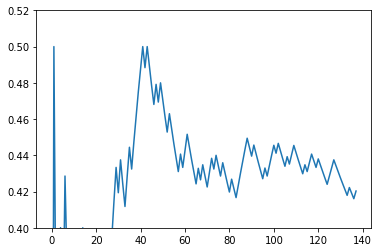

In [84]:
plt.plot(success_rate)
plt.ylim(0.40, 0.52)

In [85]:
from statsmodels.tsa.stattools import adfuller

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [110]:
result = adfuller(success_rate)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.531152
p-value: 0.108077
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


(array([ 2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  4.,  8.,  9., 17., 20.,
        18.,  8.,  7.,  2.,  1.,  3.,  1.,  2.,  1.,  3.,  0.,  3.,  0.,
         2.]),
 array([0.31818182, 0.32272727, 0.32727273, 0.33181818, 0.33636364,
        0.34090909, 0.34545455, 0.35      , 0.35454545, 0.35909091,
        0.36363636, 0.36818182, 0.37272727, 0.37727273, 0.38181818,
        0.38636364, 0.39090909, 0.39545455, 0.4       , 0.40454545,
        0.40909091, 0.41363636, 0.41818182, 0.42272727, 0.42727273,
        0.43181818, 0.43636364, 0.44090909, 0.44545455, 0.45      ,
        0.45454545, 0.45909091, 0.46363636, 0.46818182, 0.47272727,
        0.47727273, 0.48181818, 0.48636364, 0.49090909, 0.49545455,
        0.5       ]),
 <a list of 40 Patch objects>)

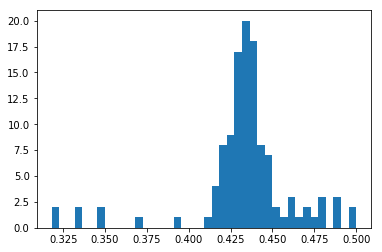

In [91]:
plt.hist(success_rate[20:], bins=40)

In [54]:
df_l_pick = df_odds[df_odds.pred_result_l == "D"]

6119.476999999999

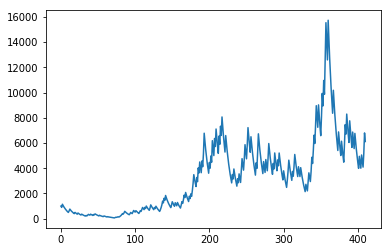

In [93]:
money = starting_money
money_history = [money]
for row in df_l_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l:
        money += stake * row.BbMxD * 0.99
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [55]:
df_m_pick = df_odds[df_odds.pred_result_m == "D"]

5447.599999999997

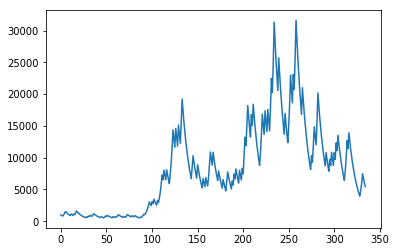

In [111]:
money = starting_money
money_history = [money]
for row in df_m_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_m:
        money += stake * row.BbMxD
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [94]:
success_rate_l = []
for i in range(1, len(df_l_pick)):
    picks_so_far = i
    df_so_far = df_l_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_l])
    rate_so_far = successes_so_far / picks_so_far
    success_rate_l.append(rate_so_far)

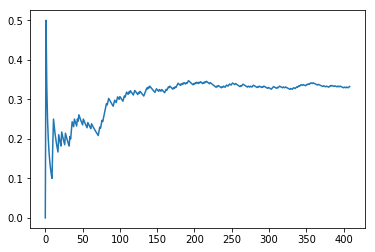

In [95]:
plt.plot(success_rate_l)

In [97]:
result = adfuller(success_rate_l[150:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.908569
p-value: 0.044361
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


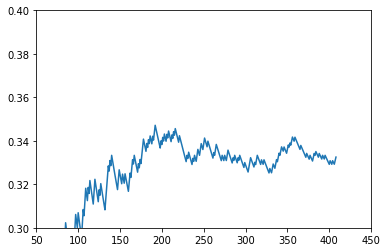

In [100]:
plt.ylim(0.30, 0.4)
plt.xlim(50,450)
plt.plot(success_rate_l)

In [103]:
success_rate_m = []
for i in range(1, len(df_m_pick)):
    picks_so_far = i
    df_so_far = df_m_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_m])
    rate_so_far = successes_so_far / picks_so_far
    success_rate_m.append(rate_so_far)

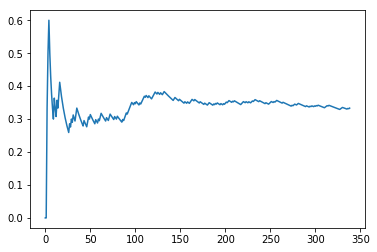

In [104]:
plt.plot(success_rate_m)

In [105]:
result = adfuller(success_rate_m[100:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.458417
p-value: 0.553972
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


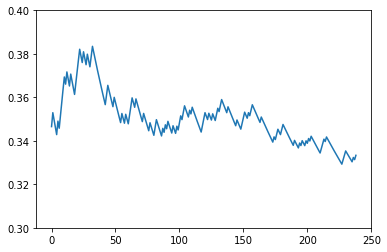

In [106]:
plt.ylim(0.30, 0.4)
plt.plot(success_rate_m[100:])

MERSON IS NOT CONSTANT

# Analysis by team

In [67]:
from collections import Counter

In [69]:
a = Counter(list(df_both_pick.Home) + list(df_both_pick.Away))

In [71]:
a.most_common()

[('Liverpool', 21),
 ('Everton', 20),
 ('Tottenham', 20),
 ('Arsenal', 16),
 ('Sunderland', 16),
 ('Newcastle', 15),
 ('Man United', 15),
 ('West Ham', 15),
 ('West Brom', 15),
 ('Swansea', 14),
 ('Chelsea', 13),
 ('Stoke', 12),
 ('Crystal Palace', 11),
 ('Leicester', 11),
 ('Man City', 11),
 ('Watford', 10),
 ('Bournemouth', 9),
 ('Southampton', 7),
 ('Aston Villa', 5),
 ('Burnley', 5),
 ('Brighton', 5),
 ('Middlesbrough', 3),
 ('QPR', 2),
 ('Norwich', 2),
 ('Hull', 2),
 ('Huddersfield', 2),
 ('Cardiff', 1)]

Hypothesis - their judgement is clouded. Liverpool, Everton Spurs and Arsenal. Check by team

In [73]:
df_both_pick_liverpool = df_both_pick[(df_both_pick.Home == "Liverpool") | (df_both_pick.Away == "Liverpool")]

In [74]:
df_both_pick_everton = df_both_pick[(df_both_pick.Home == "Everton") | (df_both_pick.Away == "Everton")]

In [75]:
df_both_pick_arsenal = df_both_pick[(df_both_pick.Home == "Arsenal") | (df_both_pick.Away == "Arsenal")]

In [76]:
df_both_pick_spurs = df_both_pick[(df_both_pick.Home == "Tottenham") | (df_both_pick.Away == "Tottenham")]

In [83]:
len(df_both_pick_liverpool[df_both_pick_liverpool.predict_draw_success_m & df_both_pick_liverpool.predict_draw_success_l]) /len(df_both_pick_liverpool)

0.3333333333333333

In [80]:
len(df_both_pick_everton[df_both_pick_everton.predict_draw_success_m & df_both_pick_everton.predict_draw_success_l])/len(df_bo)

0.55

In [81]:
len(df_both_pick_arsenal[df_both_pick_arsenal.predict_draw_success_m & df_both_pick_arsenal.predict_draw_success_l])/len(df_both_pick_arsenal)

0.4375

In [84]:
len(df_both_pick_spurs[df_both_pick_spurs.predict_draw_success_m & df_both_pick_spurs.predict_draw_success_l])/len(df_both_pick_spurs)

0.3

In [85]:
len(df_both_pick_spurs[df_both_pick_spurs.predict_draw_success_m & df_both_pick_spurs.predict_draw_success_l])

6

In [86]:
len(df_both_pick_spurs)

20

In [88]:
len(df_both_pick[~((df_both_pick.Home == "Tottenham") | (df_both_pick.Away == "Tottenham"))])

119

Is merson any better or worse with spurs/arsenal?

In [57]:
df_m_pick_arsenal = df_m_pick[(df_m_pick.Home == "Arsenal") | (df_m_pick.Away == "Arsenal")]

In [59]:
len(df_m_pick_arsenal)

23

In [60]:
len(df_m_pick_arsenal[df_m_pick_arsenal.predict_draw_success_m])

8

In [63]:
round(8/23, 2)

0.35

Same as his usual rate of 33%

In [65]:
df_m_pick_spurs = df_m_pick[(df_m_pick.Home == "Tottenham") | (df_m_pick.Away == "Tottenham")]

In [66]:
len(df_m_pick_spurs)

36

In [67]:
len(df_m_pick_spurs[df_m_pick_spurs.predict_draw_success_m])

9

In [68]:
round(9/36, 2)

0.25

seems worse- let's see if it's true

In [72]:
df_m_pick_not_spurs = df_m_pick[~((df_m_pick.Home == "Tottenham") | (df_m_pick.Away == "Tottenham"))]

In [73]:
len(df_m_pick_not_spurs)

304

In [74]:
len(df_m_pick_not_spurs[df_m_pick_not_spurs.predict_draw_success_m])

104

Not significant, p value= .26

Is Lawro any better/worse with l/ e?

In [76]:
df_l_pick_liv = df_l_pick[(df_l_pick.Home == "Liverpool") | (df_l_pick.Away == "Liverpool")]

In [77]:
len(df_l_pick_liv)

58

In [78]:
len(df_l_pick_liv[df_l_pick_liv.predict_draw_success_l])

20

In [79]:
round(20/58, 2)

0.34

Exactly the same as his 34% regular rate

In [80]:
df_l_pick_ev = df_l_pick[(df_l_pick.Home == "Everton") | (df_l_pick.Away == "Everton")]

In [81]:
len(df_l_pick_ev)

50

In [82]:
len(df_l_pick_ev[df_l_pick_ev.predict_draw_success_l])

22

In [83]:
round(22/50, 2)

0.44

A lot better than the usual average! Still not siginifcant though

In [84]:
df_l_pick_not_ev = df_l_pick[~((df_l_pick.Home == "Everton") | (df_l_pick.Away == "Everton"))]

In [85]:
len(df_l_pick_not_ev)

360

In [86]:
len(df_l_pick_not_ev[df_l_pick_not_ev.predict_draw_success_l])

114

In [87]:
len(df_l_pick)

410

p-value is 0.08